# Exploratory Data Analysis
I am the newest data professional in a fictional data consulting firm: **Automatidata**. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work.




My assistance has been requested with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. 

The management team is asking for a Python notebook showing __data structuring and cleaning__, as well as any matplotlib/seaborn visualizations plotted to help understand the data.

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables.

**The goal** is to clean data set and create a visualization.

This activity has 4 parts:

**Part 1**: Imports, links, and loading

**Part 2**: Data Exploration
- Data cleaning

**Part 3**: Building visualizations

**Part 4**: Evaluate and share results

## Data Project Questions & Considerations
Below are the questions running through my mind as I explore the project data:
* What are the data columns and variables and which ones are most relevant to my deliverable?
* What units are the variables in?
* Is there any missing or incomplete data? 
* Are all pieces of this dataset in the same format?
* Which EDA practices will be required to begin this project?

**Task 1. Imports, links, and loading**

In [33]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt

In [34]:
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

**Task 2. Data exploration and cleaning**

Here are the important considerations:
- Which columns are applicable?
- Given our scenario, which data columns are most applicable? Which data columns can I eliminate, knowing they won’t solve our problem scenario?
- What do you do about missing data (if any)?
- Are there data outliers? What are they and how can they be handled?

_We will find these answers later in this notebook_

In [35]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


From above, 
* The first column `Unnamed:0` is apparently the ID for each trip as each row is a record for individual trip.
* The `total_amount` column appears to be the sum of `fare_amount` and other amounts.

In [36]:
df.size

408582

There are over 400,000 elements in our dataframe. This includes all the values in all the columns.
This helps to estimate processing times or memory requirements for further analysis.


In [37]:
df.shape

(22699, 18)

There are over 22,000 rows and 18 columns which corresponds as indicated in the data dictionary.


In [38]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


From this statistics, we can derive the following insights already:
* The highest passenger picked in a single trip is **6**. (_Am curious though, how a taxi carried 6 passengers at once_ )
* The maximum trip distance covered in this data is approximately **34 miles**
* The Highest total amount paid in a trip is **1,200**.
* Surprisingly, the minimum fare amount in the data is **-120** which needs to be investigated

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

From the information above, the date columns are of object datatype and need to be converted to `datetime` for easier calculations like `trip duration`, extracting specific parts of the datetime and other time-based data analysis. 

In [40]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [41]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


The most applocable data variables include: `trip_distance`, `total_amount`, `tip_amount`

* *A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of `trip_distance`, `duration`, and `total_amount`*

* *A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as `trip_distance` and `total_amount`*

* *A bar chart will help determine average number of trips per month, weekday, weekend, etc.*

**Task 3. Data Visualization**

### Detection of Outliers

**Trip_Distance**

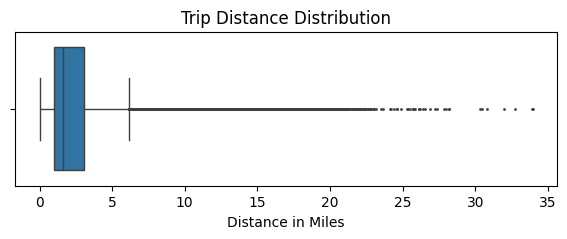

In [42]:
plt.figure(figsize=(7,2))
sns.boxplot(x= df['trip_distance'], data=None, fliersize=1)
plt.title('Trip Distance Distribution')
plt.xlabel('Distance in Miles')
plt.show()

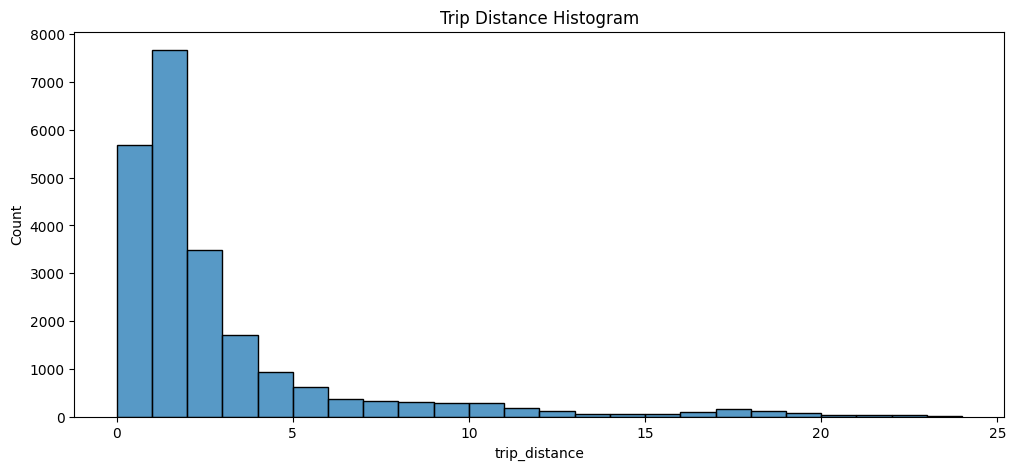

In [43]:
plt.figure(figsize=(12,5))
sns.histplot(x=df['trip_distance'], bins=range(0, 25, 1))
plt.title('Trip Distance Histogram');

The majority of trips were journeys of less than **two miles**. 

The number of trips falls away steeply as the distance traveled increases beyond two miles.

**Total_Amount**

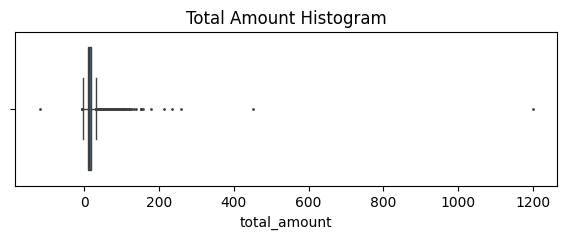

In [44]:
plt.figure(figsize=(7,2))
sns.boxplot(x= df['total_amount'], fliersize=1) 
plt.title('Total Amount Histogram');

* There are outliers in the Total Amount column
* Most amounts paid for a trip are not up to **$100** 
* We need to zoom into the majority of the datapoints

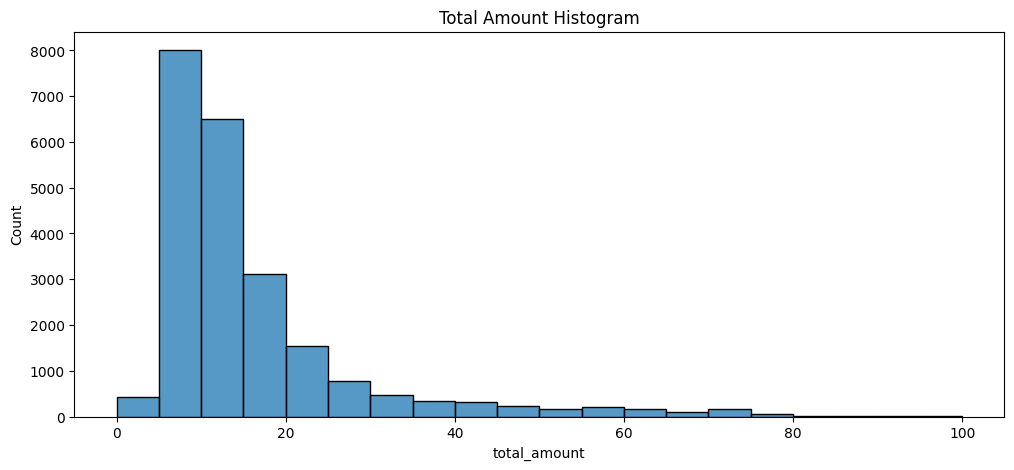

In [45]:
plt.figure(figsize=(12, 5))
sns.histplot(x= df['total_amount'], bins=range(0, 101, 5))
plt.title('Total Amount Histogram');

- This show more details of the total amount. 
- The total cost of each trip also has a distribution that skews right, with most costs falling in the **$5** and **$15**

**Tip_Amount**

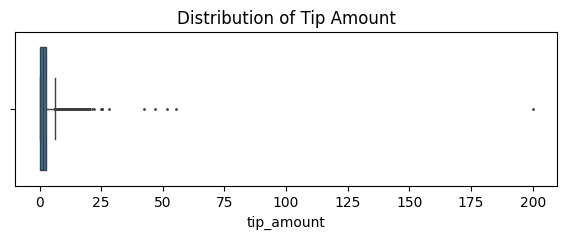

In [46]:
plt.figure(figsize=(7,2))
sns.boxplot(x= df['tip_amount'], fliersize= 1)
plt.title('Distribution of Tip Amount');

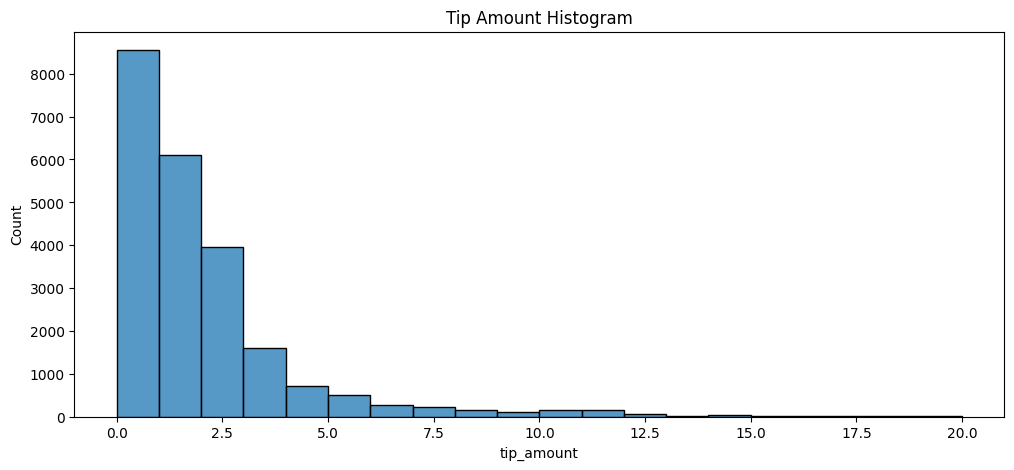

In [47]:
plt.figure(figsize=(12,5))
sns.histplot(x= df['tip_amount'], bins= range(0, 21, 1))
plt.title('Tip Amount Histogram');

Most of the tip amounts paid are less than **$3**.

**Tip_Amount by Vendor**

First, let's see which of the two vendors got most tip amount in total.

In [48]:
df[['VendorID', 'tip_amount']].groupby('VendorID').sum()

,tip_amount
VendorID,
1,18506.62
2,23163.78


Hmmm, **Vendor 2** got most tips in total.
Let's visualize with histogram. 

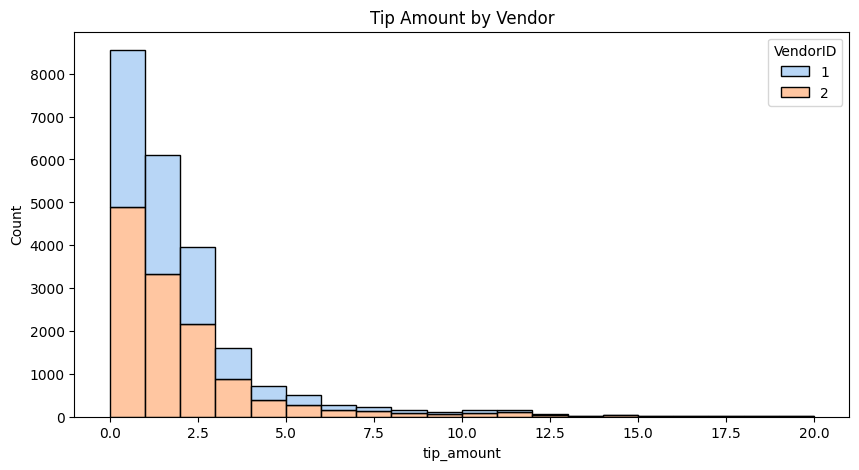

In [49]:
plt.figure(figsize= (10,5))
sns.histplot(data= df, x= df['tip_amount'],
            bins= range(0, 21, 1),
            hue= df['VendorID'],
            multiple= 'stack',
            palette= 'pastel'
            )
plt.title('Tip Amount by Vendor');

* This shows that **Vendor 1 had more tips than Vendor 2**, atleast more of the lower tip amount as evidenced by the histogram.
* However, **Vendor 2 had the more tips in total**. _something is fishy_
* Let's zoom into the higher tip amount to see if **Vendor 2** got more of the most generous tips. 

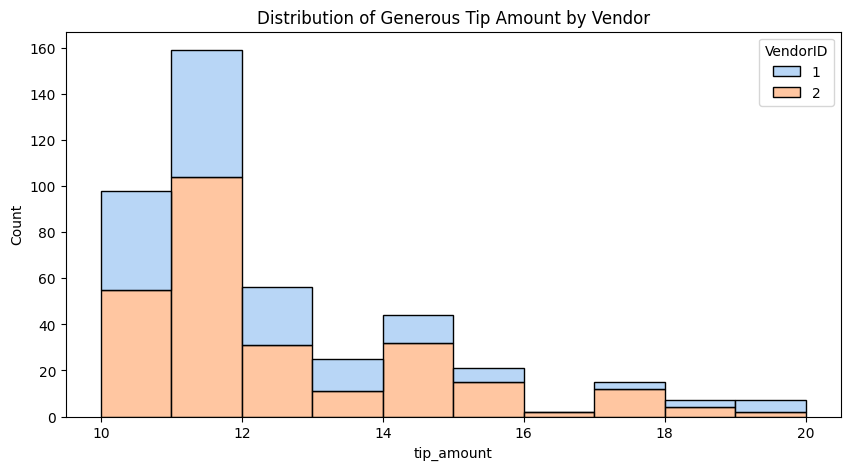

In [50]:
tip_amount_above_ten = df[df['tip_amount'] > 10]

plt.figure(figsize= (10,5))
sns.histplot(data= tip_amount_above_ten, x= tip_amount_above_ten['tip_amount'],
            bins= range(10, 21, 1),
            hue= tip_amount_above_ten['VendorID'],
            multiple= 'stack',
            palette= 'pastel'
            )
plt.title('Distribution of Generous Tip Amount by Vendor');

This made it clearer that Vendor 2 had most of the more generous tip Amounts which explains the overall higher amount

**Mean Tips by Passenger Count**

First, let's examine the unique values in the passenger count column

In [51]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

* Nearly two thirds of the rides were single occupancy, though there were still almost 700 rides with as many as six passengers. 
* Also, there are **33 rides with an occupancy count of zero**, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [52]:
mean_tips_by_passenger_count= df[['tip_amount', 'passenger_count']].groupby('passenger_count').mean()

C:\Users\ad1tyx\AppData\Local\Temp\ipykernel_17588\813498391.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= data.index,
C:\Users\ad1tyx\AppData\Local\Temp\ipykernel_17588\813498391.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x= data.index,


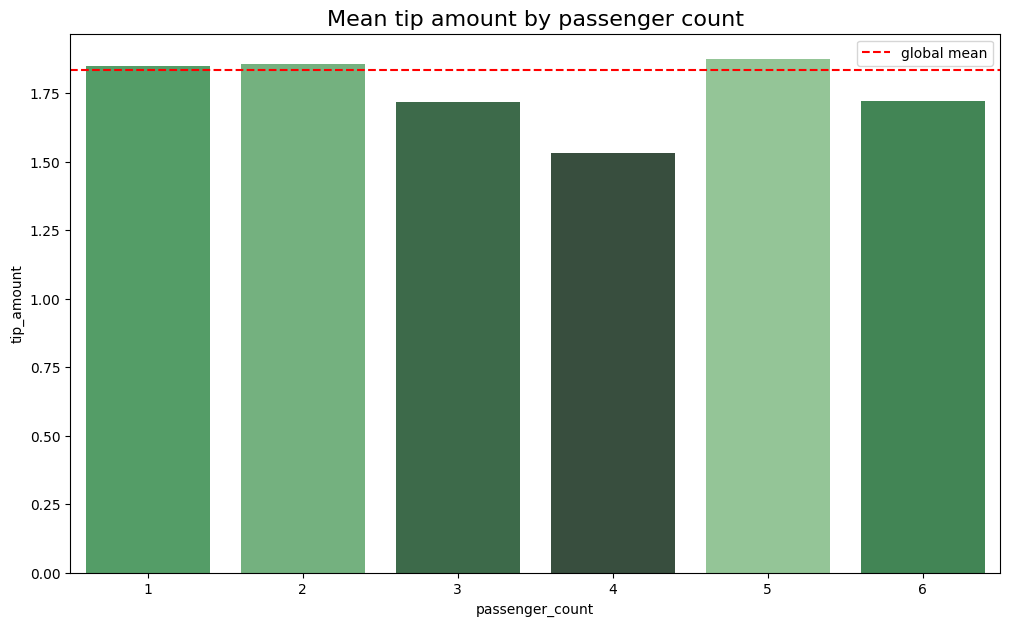

In [53]:
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette('Greens_d', len(data))
rank = data['tip_amount'].argsort().argsort()

plt.figure(figsize= (12,7))
ax = sns.barplot(x= data.index, 
                y= data['tip_amount'],
                palette= np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

* Mean tip amount varies very little by passenger count. 
* Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

**Total Rides by Month**

Let's explore how ride count varies with months of the year 2017

First, we create Month and day columns


In [54]:
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


In [55]:
monthly_rides = df['month'].value_counts() 
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

The months are out of order,
we need to put the months in calendar order for better visualization 

In [56]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

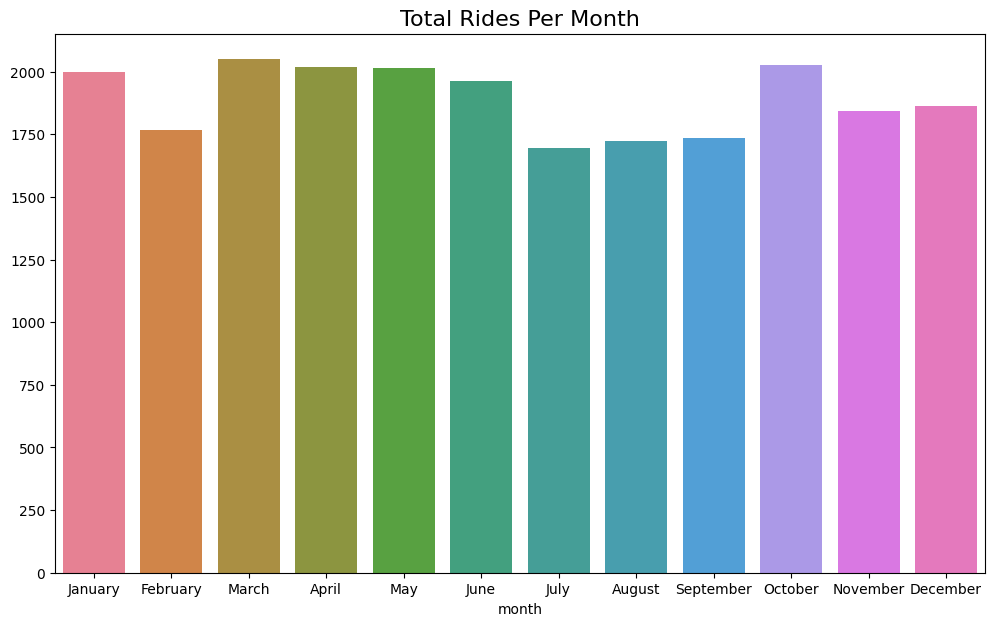

In [57]:
plt.figure(figsize=(12,7))
sns.barplot(x= monthly_rides.index, 
            y= monthly_rides.values,
            hue= monthly_rides.index)
plt.title('Total Rides Per Month', fontsize= 16);

Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

**Total Rides by Day of the Week**

How does ride count vary with day of the week.

Let's calculate total rides by day of week

In [58]:
daily_ride = df['day'].value_counts()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_ride = daily_ride.reindex(day_order)
daily_ride

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

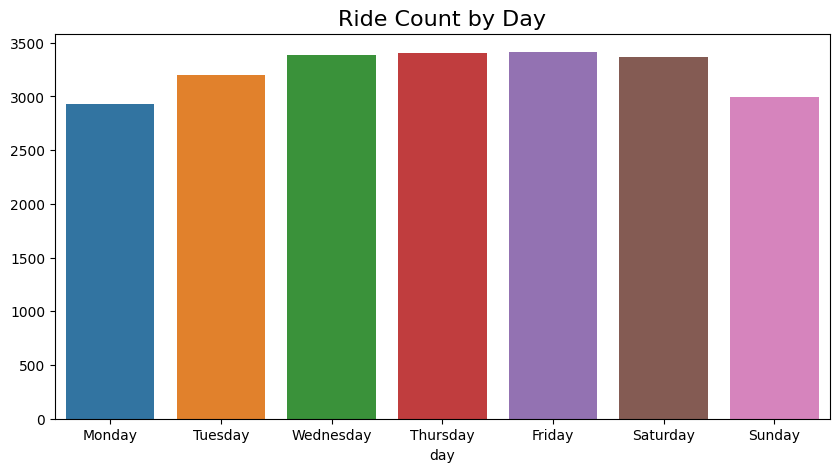

In [59]:
plt.figure(figsize= (10,5))
sns.barplot(x= daily_ride.index, y= daily_ride.values, hue= daily_ride.index)
plt.title('Ride Count by Day', fontsize= 16);

Surprisingly, Wednesday through Saturday had the highest number of daily rides while Monday and Sunday had the least

**Total Revenue by Day of the Week**

In [60]:
daily_revenue = df.groupby('day').sum('total_amount')['total_amount']
daily_revenue = daily_revenue.reindex(day_order)
daily_revenue

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64

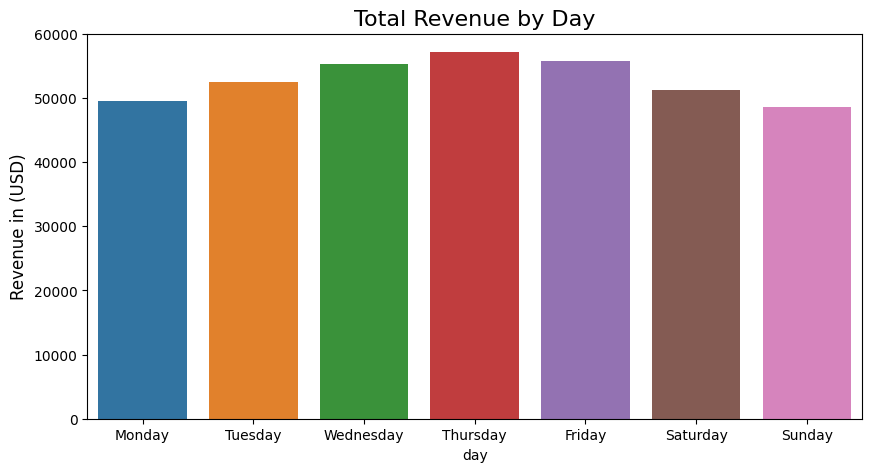

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x= daily_revenue.index, y= daily_revenue.values,
            hue= daily_revenue.index)
plt.title('Total Revenue by Day', fontsize= 16)
plt.ylabel('Revenue in (USD)', fontsize= 12);

- Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. 
- Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

**Total Revenue by Month**

In [62]:
monthly_revenue = df.groupby('month').sum('total_amount')['total_amount']
monthly_revenue = monthly_revenue.reindex(month_order)
monthly_revenue

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

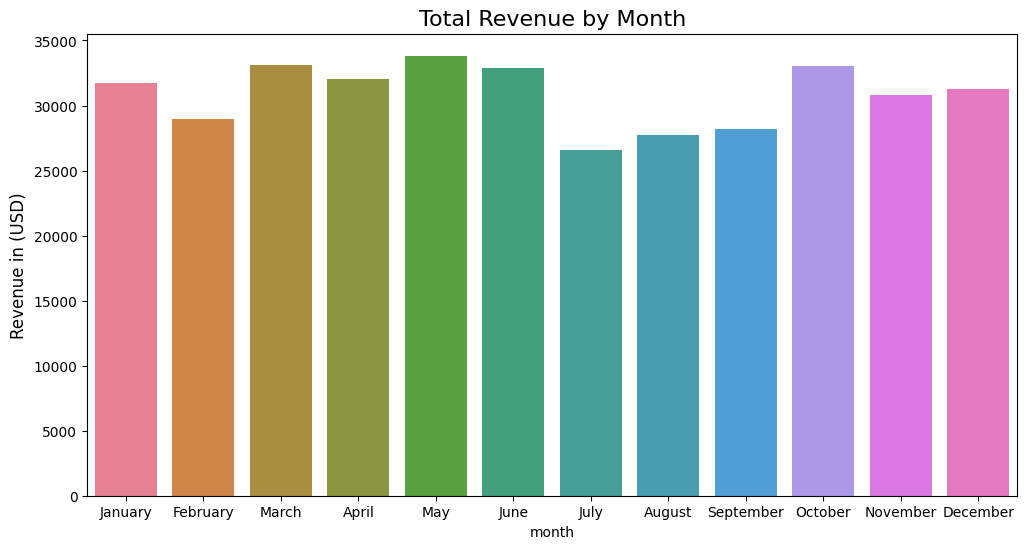

In [63]:
plt.figure(figsize=(12,6))
sns.barplot(x= monthly_revenue.index, y= monthly_revenue.values,
            hue= monthly_revenue.index)
plt.title('Total Revenue by Month', fontsize= 16)
plt.ylabel('Revenue in (USD)', fontsize= 12);

* Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

**Task 4. Results and Evaluation**

So far, the exploration of this data has revealed the following insights:
1. There are no missing values in this data.
2. The most relevant variables for my deliverables include `VendorID`, `trip_distance`, `fare_amount`, `total_amount`, `duration`.
3. This data contain outliers which need to be factored into the algorithm or removed completely.
4. Daily and monthly revenue generally conforms to the pattern of ride for that duration which is just as expected. 


**Other Uncovered Questions:**
It is also evident from above that there are several trips that have a **trip distance of "0.0"**. 
- What might those trips be? 
- Will they impact our model?

**What other information might the clients be interested in?**
* My client would likely want to know that the data includes dropoff and pickup times. 
* We can use that information to derive a trip duration for each line of data. 
* This would likely be something that will help the client with their model.
* The relationship between the trip distance and fare amount might also be important for the client and their model. 


**Executive Summary Presentation:**

Go To [Executive Summary](summary.pdf)

In [64]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43


**Conclusion**

* **EDA** helps me to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.
* Visualizations helped me understand that this dataset has some outliers that we will need to make decisions on prior to designing a model.